# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification with Multi-layer Perceptrons

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

In [1]:
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time
from math import sqrt
import nnFunctions
import importlib
%matplotlib inline

In [2]:
# run this cell if you modified the nnFunctions.py file and you wish to reload the module
importlib.reload(nnFunctions)

<module 'nnFunctions' from '/Users/anooshaseelam/Desktop/Spring 2021/Intro to ML/Assignment 2/nnFunctions.py'>

In [3]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [4]:
# load data
train_data,train_label,test_data,test_label = pickle.load(open('AI_quick_draw_sm.pickle','rb'))

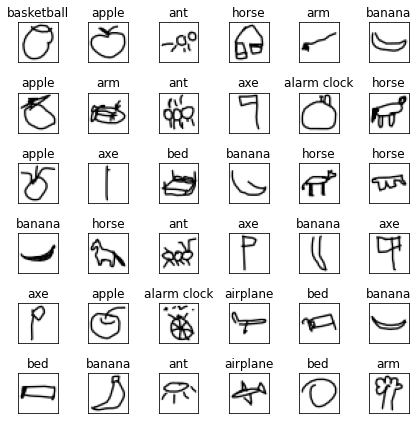

In [5]:
# visualize some images
fig = plt.figure(figsize=[6,6])
for i in range(36):
    ax = plt.subplot(6,6,i+1)    
    ind = np.random.randint(0,train_data.shape[0])
    plt.imshow(train_data[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(train_label[ind])])
plt.tight_layout()

In [38]:
#  Train Neural Network
# set the number of nodes in input unit (not including bias unit)
n_input = train_data.shape[1]

# set the number of nodes in hidden unit or M (not including bias unit)
n_hidden = 80 # you can modify this parameter

# set the number of nodes in output unit
n_class = len(np.unique(train_label)) # this parameter is fixed

# initialize the weights into some random matrices
initial_W1 = nnFunctions.initializeWeights(n_input, n_hidden)
initial_W2 = nnFunctions.initializeWeights(n_hidden, n_class)

# unroll 2 weight matrices into single column vector
initialWeights = np.concatenate((initial_W1.flatten(), initial_W2.flatten()), 0)

# set the regularization hyper-parameter
lambdaval = 12 # you can modify this parameter

args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)

# Train Neural Network using fmin_cg or minimize from scipy,optimize module. 
# Check documentation for a working example
opts = {'maxiter': 50}  # Preferred value.
st = time.time()
nn_params = minimize(nnFunctions.nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)
en = time.time()
# Reshape nnParams from 1D vector into W1 and W2 matrices
W1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
W2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))
print("Training completed in {:.2f} seconds.".format(en-st))

# Test the computed parameters

# find the accuracy on Training Dataset
predicted_label = nnFunctions.nnPredict(W1, W2, train_data)
print('Training set Accuracy: {:.2f}%'.format(100 * np.mean((predicted_label == train_label.astype(float)))))

# find the accuracy on Testing Dataset
predicted_label = nnFunctions.nnPredict(W1, W2, test_data)
print('Test set Accuracy    : {:.2f}%'.format(100 * np.mean((predicted_label == test_label.astype(float)))))

Training completed in 15.92 seconds.
Training set Accuracy: 68.98%
Test set Accuracy    : 65.31%


In [7]:
n_hidden_range = np.arange(start=10, stop=110, step=10)
train_errors = list()
test_errors = list()
for n_hidden in n_hidden_range:
    print('n_hidden is {}'.format(n_hidden))
    initial_W1 = nnFunctions.initializeWeights(n_input, n_hidden)
    initial_W2 = nnFunctions.initializeWeights(n_hidden, n_class)

    # unroll 2 weight matrices into single column vector
    initialWeights = np.concatenate((initial_W1.flatten(), initial_W2.flatten()), 0)

    # set the regularization hyper-parameter
    lambdaval = 0.5 # you can modify this parameter

    args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)

    # Train Neural Network using fmin_cg or minimize from scipy,optimize module. 
    # Check documentation for a working example
    opts = {'maxiter': 50}  # Preferred value.
    st = time.time()
    nn_params = minimize(nnFunctions.nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)
    en = time.time()
    # Reshape nnParams from 1D vector into W1 and W2 matrices
    W1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
    W2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))
    print("Training completed in {:.2f} seconds.".format(en-st))

    # Test the computed parameters

    # find the accuracy on Training Dataset
    predicted_label = nnFunctions.nnPredict(W1, W2, train_data)
    print('Training set Accuracy: {:.2f}%'.format(100 * np.mean((predicted_label == train_label.astype(float)))))
    train_errors.append(100 * np.mean((predicted_label == train_label.astype(float))))

    # find the accuracy on Testing Dataset
    predicted_label = nnFunctions.nnPredict(W1, W2, test_data)
    print('Test set Accuracy    : {:.2f}%'.format(100 * np.mean((predicted_label == test_label.astype(float)))))
    test_errors.append(100 * np.mean((predicted_label == test_label.astype(float))))

n_hidden is 10
Training completed in 11.96 seconds.
Training set Accuracy: 35.86%
Test set Accuracy    : 35.36%
n_hidden is 20
Training completed in 11.57 seconds.
Training set Accuracy: 53.65%
Test set Accuracy    : 52.05%
n_hidden is 30
Training completed in 13.05 seconds.
Training set Accuracy: 60.54%
Test set Accuracy    : 58.15%
n_hidden is 40
Training completed in 13.89 seconds.
Training set Accuracy: 66.47%
Test set Accuracy    : 63.62%
n_hidden is 50
Training completed in 14.28 seconds.
Training set Accuracy: 65.70%
Test set Accuracy    : 62.94%
n_hidden is 60
Training completed in 18.37 seconds.
Training set Accuracy: 68.17%
Test set Accuracy    : 64.84%
n_hidden is 70
Training completed in 17.05 seconds.
Training set Accuracy: 68.81%
Test set Accuracy    : 65.52%
n_hidden is 80
Training completed in 16.40 seconds.
Training set Accuracy: 68.98%
Test set Accuracy    : 65.52%
n_hidden is 90
Training completed in 19.38 seconds.
Training set Accuracy: 69.85%
Test set Accuracy    :

In [8]:
i_alpha_optim = np.argmax(test_errors)
alpha_optim = n_hidden_range[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 90


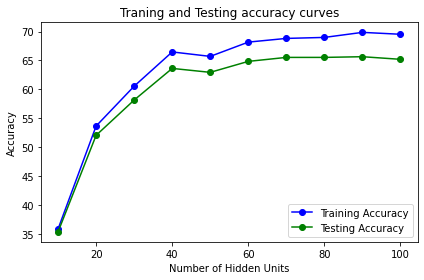

In [16]:
plt.plot(n_hidden_range, train_errors, 
     label = "Training Accuracy", color = 'b',marker='o')
plt.plot(n_hidden_range, test_errors,
   label = "Testing Accuracy", color = 'g',marker='o')
  
# Creating the plot
# plt.figure(figsize=(3, 3))
plt.title("Traning and Testing accuracy curves")
plt.xlabel("Number of Hidden Units")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

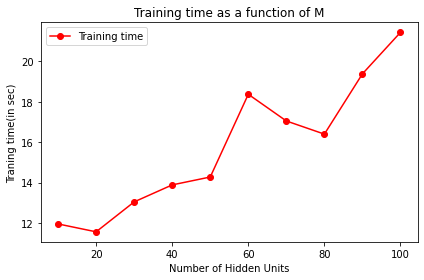

In [26]:
training_time = [11.96,11.57,13.05,13.89,14.28,18.37,17.05,16.40,19.38,21.43]
plt.plot(n_hidden_range, training_time, 
     label = "Training time", color = 'r',marker='o')

  
# Creating the plot
# plt.figure(figsize=(3, 3))
plt.title("Training time as a function of M")
plt.xlabel("Number of Hidden Units")
plt.ylabel("Traning time(in sec)")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


In [20]:
lambda_range = np.arange(start=0, stop=22, step=2)
train_errors_lambda = list()
test_errors_lambda = list()
n_hidden = 80
for lambdaval in lambda_range:
    print('n_hidden is {}'.format(lambdaval))
    initial_W1 = nnFunctions.initializeWeights(n_input, n_hidden)
    initial_W2 = nnFunctions.initializeWeights(n_hidden, n_class)

    # unroll 2 weight matrices into single column vector
    initialWeights = np.concatenate((initial_W1.flatten(), initial_W2.flatten()), 0)

    # set the regularization hyper-parameter
#     lambdaval = 0.5 # you can modify this parameter

    args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)

    # Train Neural Network using fmin_cg or minimize from scipy,optimize module. 
    # Check documentation for a working example
    opts = {'maxiter': 50}  # Preferred value.
    st = time.time()
    nn_params = minimize(nnFunctions.nnObjFunction, initialWeights, jac=True, args=args, method='CG', options=opts)
    en = time.time()
    # Reshape nnParams from 1D vector into W1 and W2 matrices
    W1 = nn_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
    W2 = nn_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))
    print("Training completed in {:.2f} seconds.".format(en-st))

    # Test the computed parameters

    # find the accuracy on Training Dataset
    predicted_label = nnFunctions.nnPredict(W1, W2, train_data)
    print('Training set Accuracy: {:.2f}%'.format(100 * np.mean((predicted_label == train_label.astype(float)))))
    train_errors_lambda.append(100 * np.mean((predicted_label == train_label.astype(float))))

    # find the accuracy on Testing Dataset
    predicted_label = nnFunctions.nnPredict(W1, W2, test_data)
    print('Test set Accuracy    : {:.2f}%'.format(100 * np.mean((predicted_label == test_label.astype(float)))))
    test_errors_lambda.append(100 * np.mean((predicted_label == test_label.astype(float))))

n_hidden is 0


/Users/anooshaseelam/Desktop/Spring 2021/Intro to ML/Assignment 2/nnFunctions.py:32: RuntimeWarning: overflow encountered in exp
  s = 1.0 / (1.0 + np.exp(-1.0 * z))


Training completed in 16.32 seconds.
Training set Accuracy: 68.59%
Test set Accuracy    : 65.46%
n_hidden is 2
Training completed in 16.39 seconds.
Training set Accuracy: 68.44%
Test set Accuracy    : 65.08%
n_hidden is 4
Training completed in 16.05 seconds.
Training set Accuracy: 69.36%
Test set Accuracy    : 65.32%
n_hidden is 6
Training completed in 15.01 seconds.
Training set Accuracy: 69.50%
Test set Accuracy    : 65.30%
n_hidden is 8
Training completed in 16.18 seconds.
Training set Accuracy: 68.92%
Test set Accuracy    : 65.16%
n_hidden is 10
Training completed in 15.37 seconds.
Training set Accuracy: 68.72%
Test set Accuracy    : 64.74%
n_hidden is 12
Training completed in 15.23 seconds.
Training set Accuracy: 69.80%
Test set Accuracy    : 65.80%
n_hidden is 14
Training completed in 16.23 seconds.
Training set Accuracy: 69.12%
Test set Accuracy    : 65.48%
n_hidden is 16
Training completed in 15.43 seconds.
Training set Accuracy: 68.39%
Test set Accuracy    : 64.33%
n_hidden is

In [ ]:
#n_hidden = 70

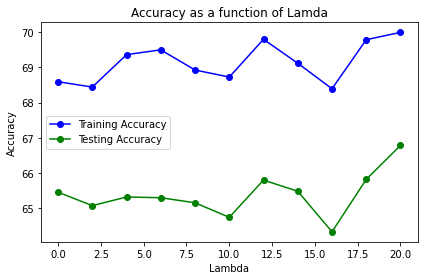

In [27]:
plt.plot(lambda_range, train_errors_lambda, 
     label = "Training Accuracy", color = 'b',marker='o')
plt.plot(lambda_range, test_errors_lambda,
   label = "Testing Accuracy", color = 'g',marker='o')
  
# Creating the plot
plt.title("Accuracy as a function of Lamda")
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

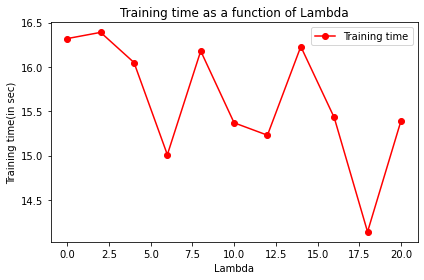

In [5]:
training_time = [16.32,16.39,16.05,15.01,16.18,15.37,15.23,16.23,15.43,14.14,15.39]
lambda_range = np.arange(start=0, stop=22, step=2)
plt.plot(lambda_range, training_time, 
     label = "Training time", color = 'r',marker='o',)

  
# Creating the plot
# plt.figure(figsize=(3, 3))
plt.title("Training time as a function of Lambda",color= 'black')
plt.xlabel("Lambda")
plt.ylabel("Training time(in sec)")
plt.tight_layout()
# plt.label.set_color('black')
plt.legend(loc = 'best')
plt.show()


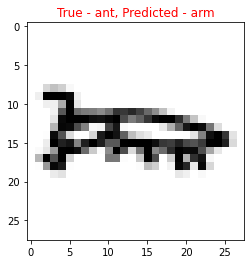

In [102]:
# visualize prediction on a random image
rnd_ind = np.random.randint(test_label.shape[0])
predicted_label = nnFunctions.nnPredict(W1,W2,test_data[rnd_ind:rnd_ind+1,:])
if predicted_label[0] == test_label[rnd_ind]:
    params = {"text.color" : "green"}
else:
    params = {"text.color" : "red"}
plt.rcParams.update(params)

plt.imshow(test_data[rnd_ind,:].reshape((28,28)),cmap='Greys')
t = plt.title('True - {}, Predicted - {}'.format(classes[int(test_label[rnd_ind])],classes[int(predicted_label[0])]))

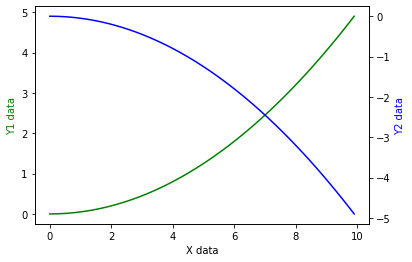

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1
    
fig, ax1 = plt.subplots()
    
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')
    
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')
    
plt.show()
